#### 데이터: 특정 제품 수리를 전문적으로 진행하는 회사의 정보로 가정

- 해당 회사의 업무 프로세스 이해 : 데이터가 어떤 순서로 어떤 적재를 진행
- 데이터 자체에 대한 EDA 및 주요 포인트 내용 정리
- EDA 과정 전후로 확인된 특징에 대해 해당 회사에 고쳐야 할(as-is -> to-be) 내용 정의 및 정리

# -------------------------------------------------

# 1. 데이터 구조 및 업무 프로세스 파악

## 1-1. 데이터 구조 및 현황 파악

- 데이터 로드

In [3]:
import pandas as pd

df = pd.read_csv('./refine_source_202206261232.csv')
df.head()

,caseID,FirstContact,FirstContact_type,FirstContact_originator,InformClientWrongPlace,InformClientWrongPlace_originator,MakeTicket_start,MakeTicket_end,MakeTicket_originator,MakeTicket_originator:1,...,InternRepair_end_originator,ImmediateRepair_start,ImmediateRepair_start_originator,ImmediateRepair_end,ImmediateRepair_end_originator,ExternRepair,ExternRepair_originator,SendTicketToFinAdmin,ReadyInformClient,TicketReady
0,1,1970-01-02 08:08,Phone,Dian,NaN,NaN,1970-01-02 08:08,1970-01-02 08:11,E,Dian,...,John,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-17 14:03,1970-01-17 15:44,1970-01-17 15:44
1,2,1970-01-08 05:17,Personal,Dian,NaN,NaN,1970-01-08 05:17,1970-01-08 05:21,P,Dian,...,NaN,1970-01-12 04:57,Anne,1970-01-12 06:57,Anne,1970-01-12 06:57,DoIt,1970-01-12 15:14,1970-01-12 11:17,1970-01-12 15:14
2,3,1970-01-03 01:03,Phone,Dian,NaN,NaN,1970-01-03 01:03,1970-01-03 01:10,E,Dian,...,Paul,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07 06:26,1970-01-07 07:04,1970-01-07 07:04
3,4,1970-01-03 08:23,Personal,Monica,NaN,NaN,1970-01-03 08:23,1970-01-03 08:27,P,Monica,...,NaN,1970-01-04 17:42,Anne,1970-01-04 19:42,Anne,NaN,NaN,1970-01-04 23:35,1970-01-04 20:56,1970-01-04 23:35
4,5,1970-01-07 20:41,Letter,Monica,NaN,NaN,1970-01-07 20:41,1970-01-07 20:47,P,Monica,...,NaN,1970-01-09 23:22,Anne,1970-01-10 01:10,Anne,NaN,NaN,1970-01-10 06:05,1970-01-10 01:14,1970-01-10 06:05


- 데이터 형태(1000, 32) : caseID 포함 32개 컬럼, 1000개 로우

In [5]:
df.shape

(1000, 32)

- 1970-1-1부터 1970-1-8까지 수집/적재된 case ID와 각 task별 시작/종료시각, 담당자명 데이터가 있는 프로세스 데이터

In [7]:
pd.to_datetime(df.FirstContact).dt.date.unique()

array([datetime.date(1970, 1, 2), datetime.date(1970, 1, 8),
       datetime.date(1970, 1, 3), datetime.date(1970, 1, 7),
       datetime.date(1970, 1, 4), datetime.date(1970, 1, 5),
       datetime.date(1970, 1, 1), datetime.date(1970, 1, 6)], dtype=object)

In [743]:
pd.to_datetime(df.TicketReady).dt.date.unique()

array([datetime.date(1970, 1, 17), datetime.date(1970, 1, 12),
       datetime.date(1970, 1, 7), datetime.date(1970, 1, 4),
       datetime.date(1970, 1, 10), NaT, datetime.date(1970, 1, 14),
       datetime.date(1970, 1, 11), datetime.date(1970, 1, 9),
       datetime.date(1970, 1, 6), datetime.date(1970, 1, 8),
       datetime.date(1970, 1, 3), datetime.date(1970, 1, 15),
       datetime.date(1970, 1, 5), datetime.date(1970, 1, 19),
       datetime.date(1970, 1, 2), datetime.date(1970, 1, 1),
       datetime.date(1970, 1, 13), datetime.date(1970, 1, 18),
       datetime.date(1970, 1, 16), datetime.date(1970, 1, 20)],
      dtype=object)

In [2]:
df.columns

Index(['caseID', 'FirstContact', 'FirstContact_type',
       'FirstContact_originator', 'InformClientWrongPlace',
       'InformClientWrongPlace_originator', 'MakeTicket_start',
       'MakeTicket_end', 'MakeTicket_originator', 'MakeTicket_originator:1',
       'ArrangeSurvey_start', 'ArrangeSurvey_end', 'ArrangeSurvey_originator',
       'InformClientSurvey', 'InformClientSurvey_originator', 'Survey_start',
       'Survey_end', 'EstimatedRepairTime', 'Survey_originator',
       'InternRepair_start', 'InternRepair_start_originator',
       'InternRepair_end', 'InternRepair_end_originator',
       'ImmediateRepair_start', 'ImmediateRepair_start_originator',
       'ImmediateRepair_end', 'ImmediateRepair_end_originator', 'ExternRepair',
       'ExternRepair_originator', 'SendTicketToFinAdmin', 'ReadyInformClient',
       'TicketReady'],
      dtype='object')

- 전반적으로 결측치가 많음 -> 서로 관련 있는 변수로부터 기인함 (task별 데이터가 분리되어 있지 않음)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   caseID                             1000 non-null   int64  
 1   FirstContact                       1000 non-null   object 
 2   FirstContact_type                  1000 non-null   object 
 3   FirstContact_originator            1000 non-null   object 
 4   InformClientWrongPlace             73 non-null     object 
 5   InformClientWrongPlace_originator  73 non-null     object 
 6   MakeTicket_start                   927 non-null    object 
 7   MakeTicket_end                     927 non-null    object 
 8   MakeTicket_originator              927 non-null    object 
 9   MakeTicket_originator:1            927 non-null    object 
 10  ArrangeSurvey_start                927 non-null    object 
 11  ArrangeSurvey_end                  927 non-null    object

## 1-2. 업무 프로세스 도식화

- 업무 프로세스


    1) 고객 접수
    2) CS (청구서 생성 및 사전상담(진단))
    3) 시스템 전산화
    4) 엔지니어 (상담 및 수리)
    5) 청구서 발행

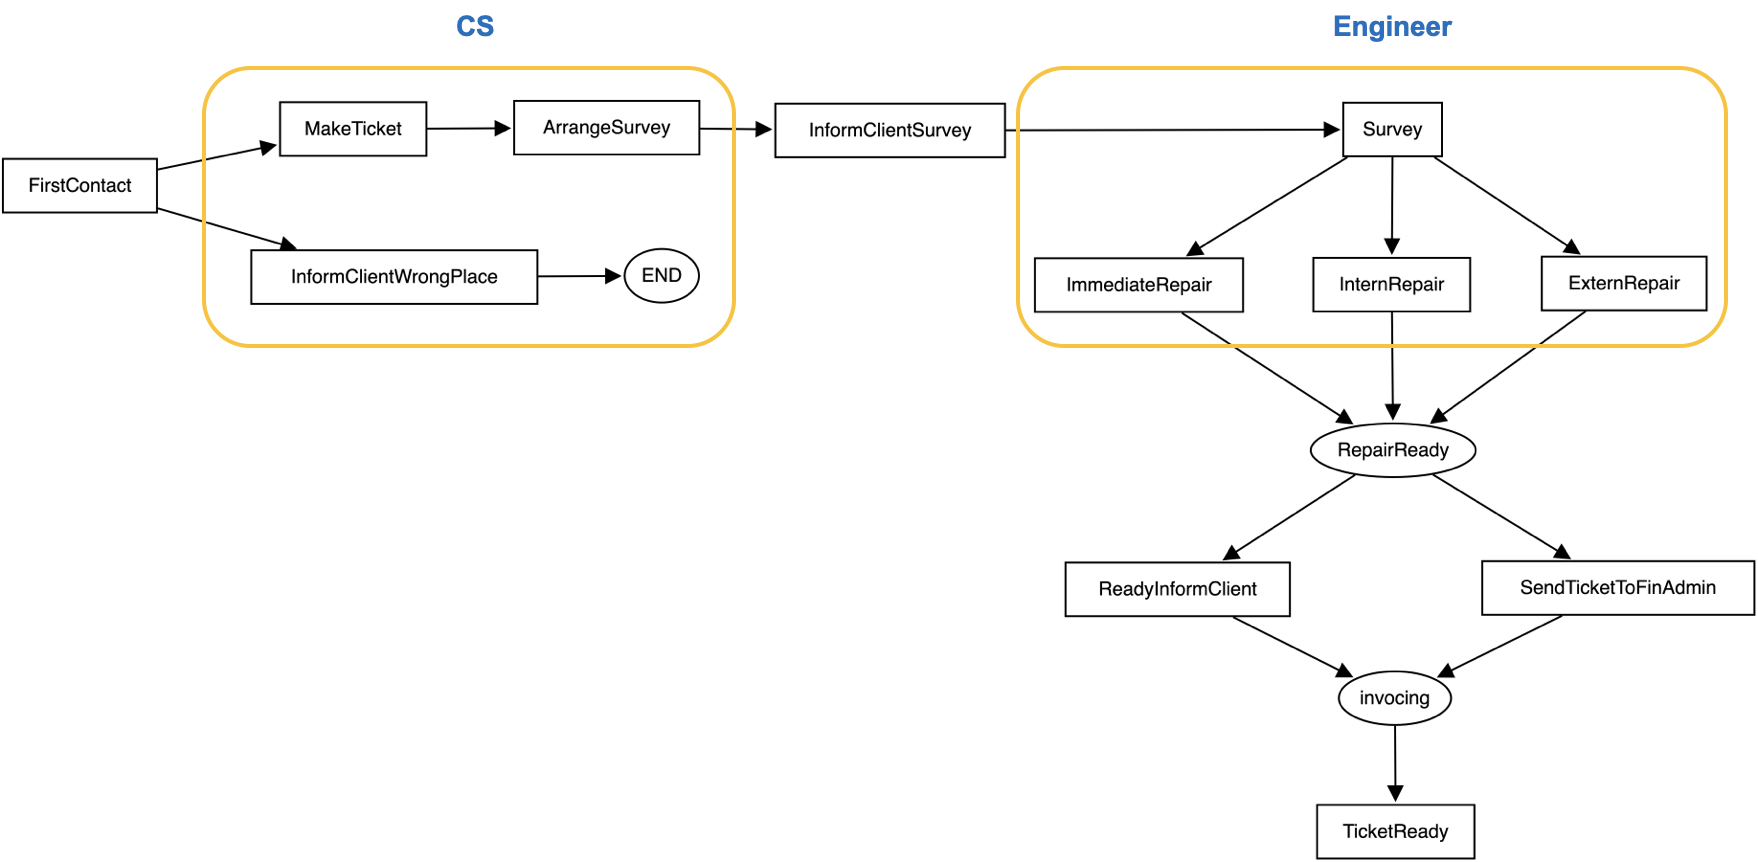

# 2. 탐색적 데이터 분석

## 2-1. 변수별 특징 분석

- ### InformClientWrongPlace

=> InformClientWrongPlace 변수의 유효한 값 73개

=> 고객 정보가 잘못 접수되어 다음 단계가 진행되지 않았고, 이로 인해 다음 단계의 변수들이 결측 처리 됨 (MakeTicket, ArrangeSurvey, InformClientSurvey, Survey, EstimatedRepairTime, SendTicketToFinAdmin, ReadyInformClient, TicketReady)

=> 1000개의 케이스 중 수리가 완료되어 청구서가 발 행된 건수 = 927건

In [9]:
df.isnull().sum()

caseID                                 0
FirstContact                           0
FirstContact_type                      0
FirstContact_originator                0
InformClientWrongPlace               927
InformClientWrongPlace_originator    927
MakeTicket_start                      73
MakeTicket_end                        73
MakeTicket_originator                 73
MakeTicket_originator:1               73
ArrangeSurvey_start                   73
ArrangeSurvey_end                     73
ArrangeSurvey_originator              73
InformClientSurvey                    73
InformClientSurvey_originator         73
Survey_start                          73
Survey_end                            73
EstimatedRepairTime                   73
Survey_originator                     73
InternRepair_start                   492
InternRepair_start_originator        492
InternRepair_end                     492
InternRepair_end_originator          492
ImmediateRepair_start                617
ImmediateRepair_

- ### SendTicketToFinAdmin, ReadyInformClient

=> 변수 간 선후관계는 없으며, 후에 진행된 변수의 시점에 TicketReady가 동시에 처리됨

=> System으로 전산 처리됨

In [10]:
df[['SendTicketToFinAdmin', 'ReadyInformClient', 'TicketReady']]

,SendTicketToFinAdmin,ReadyInformClient,TicketReady
0,1970-01-17 14:03,1970-01-17 15:44,1970-01-17 15:44
1,1970-01-12 15:14,1970-01-12 11:17,1970-01-12 15:14
2,1970-01-07 06:26,1970-01-07 07:04,1970-01-07 07:04
3,1970-01-04 23:35,1970-01-04 20:56,1970-01-04 23:35
4,1970-01-10 06:05,1970-01-10 01:14,1970-01-10 06:05
...,...,...,...
995,1970-01-02 14:44,1970-01-02 17:15,1970-01-02 17:15
996,1970-01-15 00:59,1970-01-15 04:14,1970-01-15 04:14
997,1970-01-19 13:55,1970-01-19 11:44,1970-01-19 13:55
998,1970-01-07 16:25,1970-01-07 13:11,1970-01-07 16:25


- ### FirstContact_type

=> 네 가지 접수 유형의 비율은 약 25%대로 비슷함

In [17]:
df.FirstContact_type.unique()

array(['Phone', 'Personal', 'Letter', 'Web'], dtype=object)

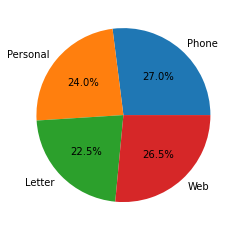

In [18]:
Phone_cnt = 0
Personal_cnt = 0
Letter_cnt = 0
Web_cnt = 0

for i in range(1000):
    types = df['FirstContact_type'][i]
    if types == 'Phone':
        Phone_cnt += 1
    elif types == 'Personal':
        Personal_cnt += 1
    elif types == 'Letter':
        Letter_cnt += 1
    else:
        Web_cnt += 1

import matplotlib.pyplot as plt

ratio = [Phone_cnt, Personal_cnt, Letter_cnt, Web_cnt]
labels = ['Phone', 'Personal', 'Letter', 'Web']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

## 2-2. 수리 유형(InternRapair, ImmediateRepair, ExternRepair)

- 세 가지 수리 유형은 InternRepair(508) > ImmediateRepair(383) > ExternRepair(132) 순으로 많음
- 수리 완료 후 청구서 발행 건수(927건)보다 수리 유형별 수 리 건수 합(508+383+132 = 1023건)이 더 많음

=> 수리 유형별 중복 작업된 케이스가 존재함

=> 단, 같은 유형(e.g. InternRepair만 두 번 진행하는 경우)의 중복 건은 1건으로 처리함

In [21]:
repair_type = []
columns = df.columns

for i in columns:
    if 'InternRepair' in i or 'ImmediateRepair' in i or 'ExternRepair' in i:
        repair_type.append(i)

df[repair_type].notnull().sum()

InternRepair_start                  508
InternRepair_start_originator       508
InternRepair_end                    508
InternRepair_end_originator         508
ImmediateRepair_start               383
ImmediateRepair_start_originator    383
ImmediateRepair_end                 383
ImmediateRepair_end_originator      383
ExternRepair                        132
ExternRepair_originator             132
dtype: int64

- 2가지, 3가지 유형의 수리가 진행된 케이스 총 91건 존재함

=> 재작업이 발생한 케이스로, 발생 원인에 대한 파악이 필요함

<AxesSubplot:>

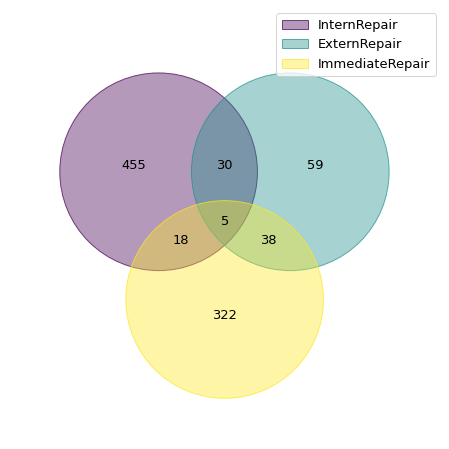

In [38]:
from venn import venn
%matplotlib inline

repairs = {
    "InternRepair" : set(intern_list),
    "ExternRepair" : set(extern_list),
    "ImmediateRepair" : set(immediate_list)
}

venn(repairs)

## 2-3. 담당자별 처리한 케이스 건수

- CS 단계(FirstContcat 부터 ArrangeSurvey)는 직원 2명(Dian, Monica)이 담당하고 있음
- 외부업체 수리(ExternRepair)는 직원 2명(Dolt, Fixlt)이 담당하고 있음
- Survey 담당자 중 Anne이 담당한 케 이스가 다른 직원들에 비해 2배 이상 이 높으며, InternRepair 건수에 비해 ImmediateRepair 건수가 월등히 높 음 => 간단하고 빠르게 처리할 수 있 는 케이스 위주로 담당하는 것으로 추정됨
- [ 1 ]의 경우, 같은 InternRepair 작업 인데 시작 담당자와 종료 담당자가 다른 경우가 있음 => 수리하는 과정 중 담당자가 바뀌어 진행되는 경우가 있는 것으로 추정됨
- [ 2 ]의 경우, Survey 단계부터 InternRepair, ImmediateRepair 작업 에서 직원 4명 (Ben, Nick, Lex, Eric) 의 담당 건수가 공통적으로 적음 => 초급 기술자이거나 특수 케이스만 진 행하는 특급 기술자로 추정됨 => 작 업시간, 유형 등 다른 요인을 통한 분 석이 필요함

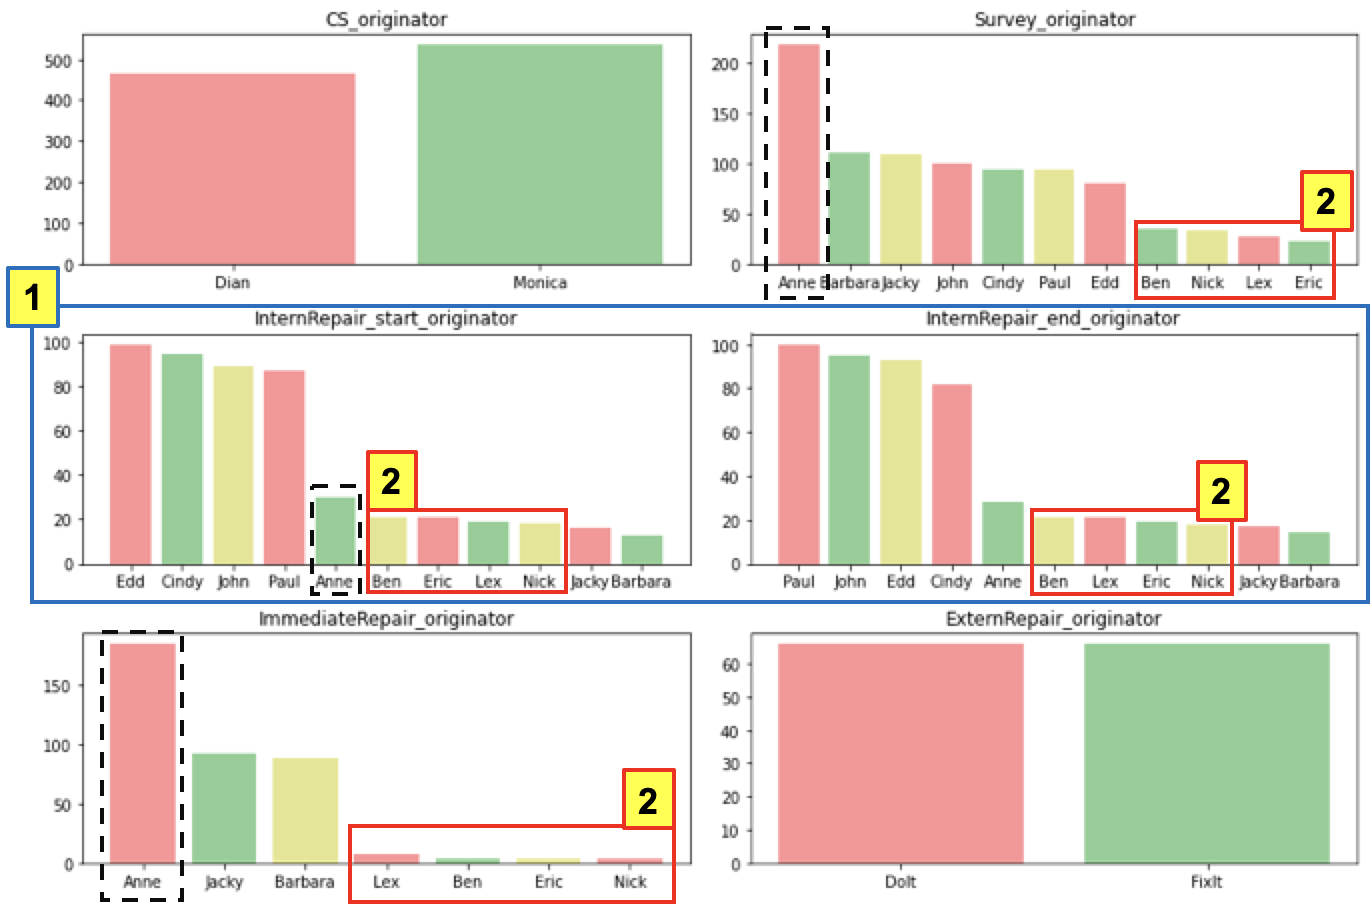

## 2-4. 수리 담당자 분석

### MakeTicket_originator가 B이며 수리 유형이 외부업체 수리(ExternRepair)가 아닌 케이스를 처리한 담당자 및 건수

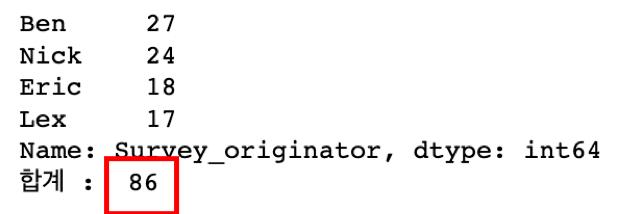

- 앞서 담당자별 처리한 케이스 건수 분석 중 직원 4명 (Ben, Nick, Lex, Eric)의 케이스 건수가 적음을 발견함
- Ben, Nick, Lex, Eric이 Survey를 진행한 케이스 조회 시 모두 MakeTicket_originator가 B이며, MakeTicket_originator가 B 유형인 경우를 조회했을 때에도 Ben, Nick, Lex, Eric이 담당자로 총 118건이 조회됨
- 한편, Ben, Nick, Lex, Eric이 Survey를 진행한 케이스 (모두 MakeTicket_originator == B) 중 외부업체 수리(ExternRepair)가 진행된 케이스 32건이 발견됨. 따라서 Ben, Nick, Lex, Eric이 Survey하고 직접 Repair한 케이스는 86건에 불과함

=> 외부업체 직원 2명을 포함하여 Repair를 진행하는 직원은 총 13명임

=> 수리가 완료된 케이스 927건 중 4명의 직원이 86건을 담당한 한편, 나머지 9명의 직원이 약 711건을 담당함. 대략적으로 9명의 직원이 각 78건의 케이스를 진행함

### MakeTicket_originator 유형별 예상 소요시간

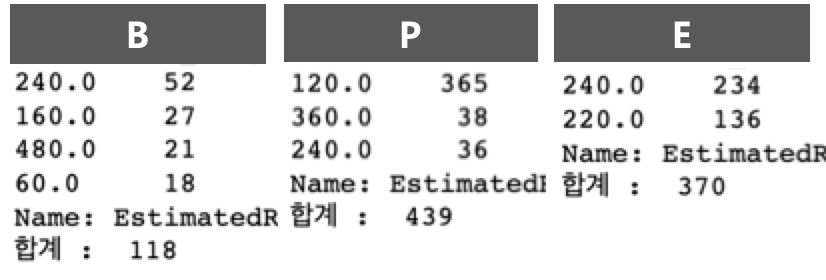

- Ben, Nick, Lex, Eric이 담당하는 MakeTicket_originator가 B 유형인 케이스의 예상 소요시간은 위와 같음

=> 예상소요시간이 480분인 케이스가 있는 것으로 미루어 보아 B 유형은 P, E에 비해 난이도가 있는 케이스로 생각됨

=> 따라서 Ben, Nick, Lex, Eric 은 특급 기술자로 추정됨

## 2-5. 작업 단계 간 소요시간

### CS 단계 소요시간
: 처음 접수되는 FirstContact 시간부터 사전 상담(진단)이 끝나고 기록이 시스템 전산화되는 InformClientSurvey까지 소요되는 시간

In [470]:
CS_total_time_df.describe()

,caseID,times
count,1000.000000,927
mean,499.500000,0 days 02:04:59.093851132
std,288.819436,0 days 04:40:37.627461434
min,0.000000,0 days 00:04:00
25%,249.750000,0 days 00:07:00
50%,499.500000,0 days 00:09:00
75%,749.250000,0 days 00:15:00
max,999.000000,1 days 12:31:00


- 전체 1000건의 케이스 중 잘못 접수된 케이스 73건을 제외한 927건의 케이스에서 전체의 75% 가 15분 내로 접수 및 사전 상담(진단)이 완료됨
- 반면, 45건의 케이스가 접수에서 사전 상담이 완료될 때까지 12시간 이상 (최대 36.5시간)이 소요됨

### 접수 후 수리 상담(Survey)이 시작되기까지 소요시간
: CS 단계 완료(~ InformClientSurvey) 후 수리 담당자가 진행하는 상담(Survey)가 시작되기까지 소요되는 시간

In [497]:
to_survey_time.describe()

,caseID,times
count,1000.000000,927
mean,500.500000,3 days 04:45:36.569579288
std,288.819436,3 days 06:24:49.104817742
min,1.000000,0 days 00:00:00
25%,250.750000,0 days 06:45:00
50%,500.500000,2 days 00:46:00
75%,750.250000,5 days 13:24:00
max,1000.000000,13 days 15:40:00


- 전체 927건 케이스에서 접수 완료 후 수리 담당자의 Survey가 시작되기까지 평균 3일 이상을 대기함
- 또한 총 148건 케이스에서 일주일(7일) 이상 대기하는 경우가 발생함

### Survey 후 수리 시작까지 소요시간
: 수리 담당자가 진행하는 상담(Survey)이 종료된 시점부터 실제 Repair가 시작되기까지 소요되는 시간

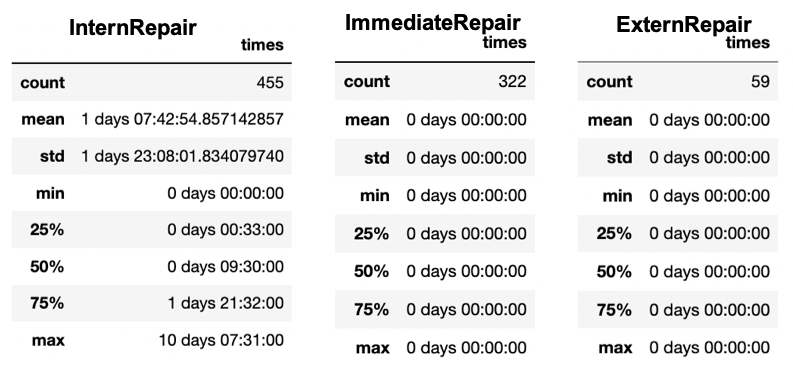

- 재작업 발생 케이스 91건을 제외한 826건의 InternRepair, ImmediateRepair, ExternRepair 케이스만 조회함
- InternRepair의 경우, 수리 담당자의 Survey 후 실질적인 수리가 시작되기까지 75%의 케이스가 2일이 걸리지 않지만, 109건의 케이스가 2일 이상 소요됨
- ImmediateRepair의 경우, 즉시 수리이기 때문에 Survey가 끝난 직후 수리가 시작됨
- 재작업이 없는 단순 ExternRepair의 경우, 곧바로 수리 시점이 시작됨 

=> 부품 또는 현장에서 수리할 수 없는 카테고리가 존재할 것으로 추정됨

### 접수 후 청구서 발행까지의 프로세스 전체 소요시간
: 처음 접수되는 FirstContact 시점부터 청구서 발행 준비가 완료되는 TicketReady 까지 하나의 케이스 전체 소요시간

In [505]:
total_repair_time.describe()

,caseID,times
count,1000.000000,927
mean,500.500000,4 days 09:52:21.877022653
std,288.819436,4 days 01:31:13.465041270
min,1.000000,0 days 04:13:00
25%,250.750000,0 days 21:59:30
50%,500.500000,3 days 02:32:00
75%,750.250000,7 days 02:04:00
max,1000.000000,17 days 01:41:00


- 전체 927건 케이스가 처음 접수되어 청구서가 발행되는 수리 완료시점까지 평균 4일 9시간 52분이 소요됨
- 25%의 케이스가 7일 이상 소요됨

=> 접수 후 Survey 시작 전의 단계, Survey 종료 후 수리 시작까지 단계에 병목현상이 발생하여 전체 프로세스 기간이 길어진 케이스들로 추정됨

# 3. 데이터 탐색 후 개선사항 제안

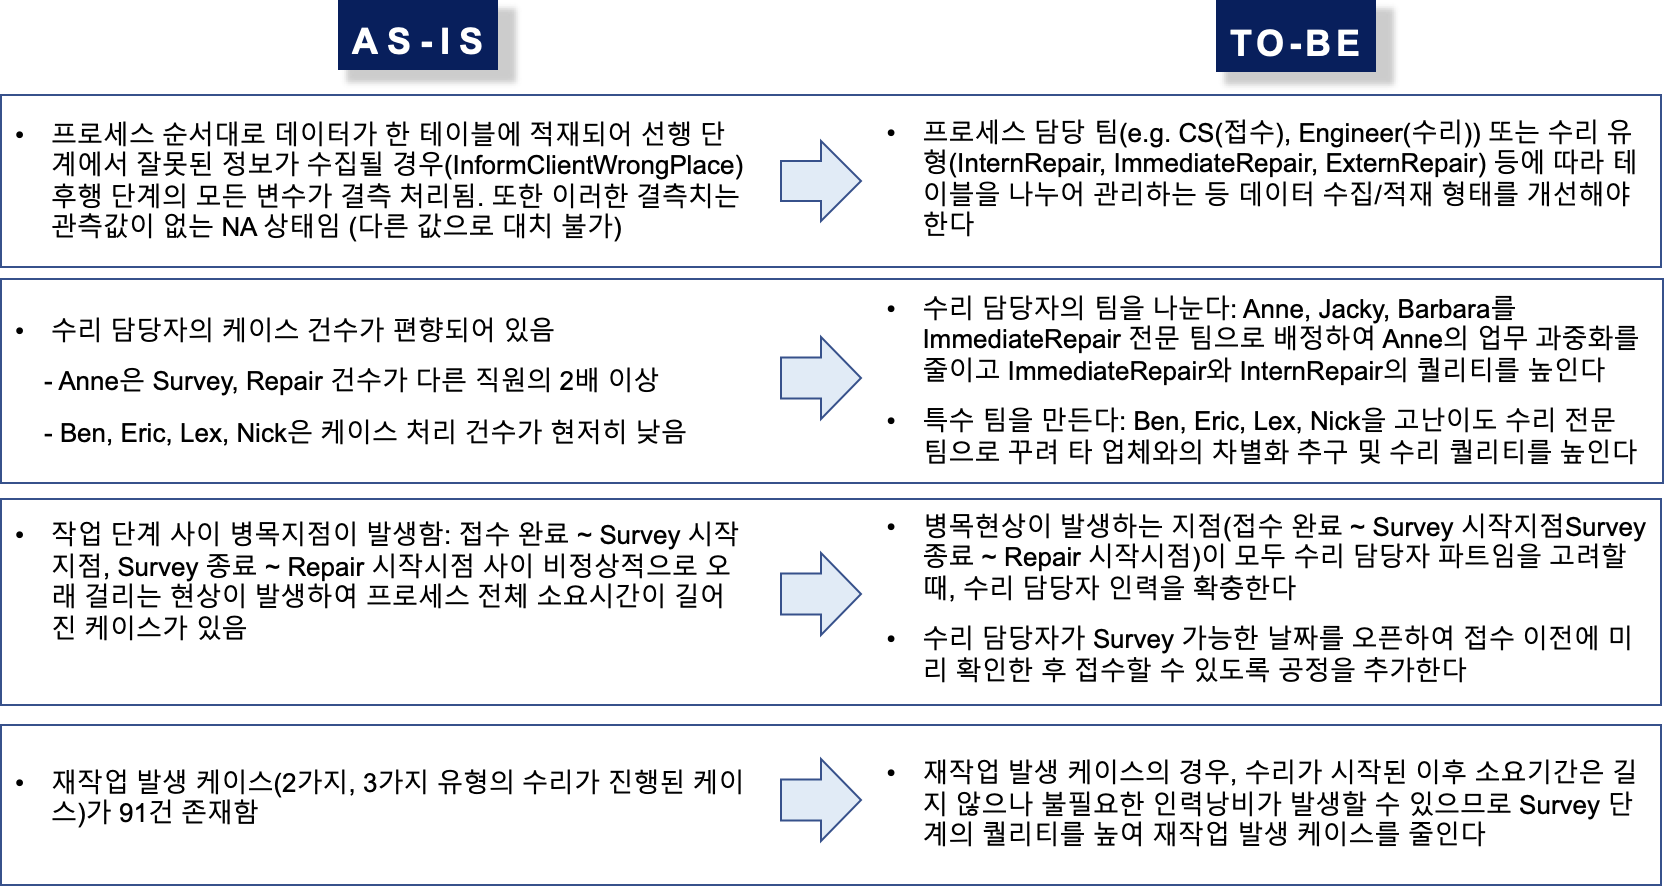